In this tutorial I will show you how to add features to ```pirel.pcells``` classes.

In fact, the functions in ```pirel.modifiers``` return new classes with extended functionality.

In [1]:
import pirel.pcells as pc
import pirel.modifiers as pm

For example, let's say that we need vias at the top and at the bottom of an ```pc.iDT``` device.

Here is what to do:

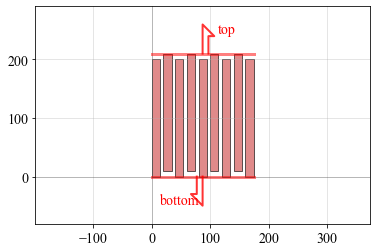

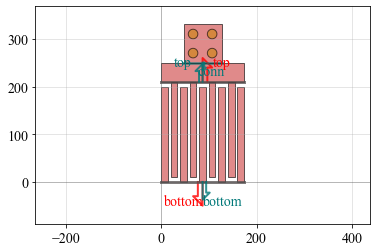

In [2]:
simple_idt=pc.IDT()

viaidt_class=pm.addVia(pc.IDT,'top')

idt_wvia=viaidt_class(name='NewIdt instance')

simple_idt.view()

idt_wvia.view()

note that ```pm.addVia``` takes as class as input, and returns a class as output ( These functions are called *class factories* )

```top``` specifies that the resulting class will have ```Via``` at the top ```phidl.Port```.

we can also create another class with vias on top and bottom ports...

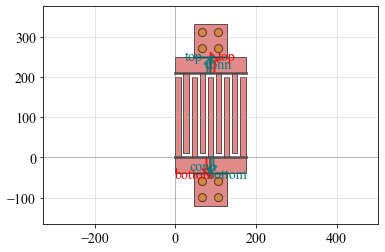

In [3]:
idt_wvia_tb_class=pm.addVia(pc.IDT,['top','bottom']) 

idt_wvia_tb=idt_wvia_tb_class(name='TopBottomVia Instance')

idt_wvia_tb.view()

Another example of useful ```modifiers``` is ```pm.array``` , which has a sort of obvious effect...

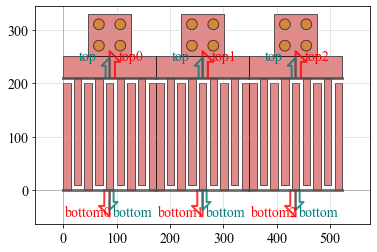

In [4]:
idt_wvia_warray=pm.array(viaidt_class,3)

idt_wvia_warray().view()

Because of how these factories are designed, all the classes in ```pcells``` can be expanded with ```modifiers``` independently:

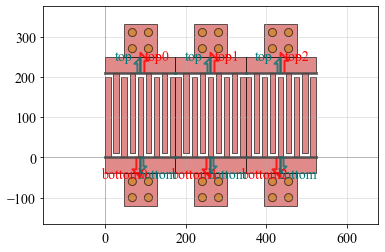

In [5]:
idt_wvia_warray=pm.array(idt_wvia_tb_class,3)

idt_wvia_warray().view()

by creating new classes, more complex classes are created: they inherit more parameters that are controllable in the same way of all the other ```pcells```.

In [12]:
complex_cell=idt_wvia_warray(name='Complex')

pars=complex_cell.get_params()

complex_cell

ViaShape                                circle
ViaSize                                     20
Name                                   Complex
Length                                   200.0
Pitch                                     20.0
YOffset                                   10.0
Coverage                                   0.7
N                                            4
ActiveAreaMargin                           0.5
OverVia                                    2.0
ViaDistance                                 40
ViaAreaX                                 100.0
ViaAreaY                                 100.0
NBlocks                                      3
Type                      3 array of IDT w Via
SingleDeviceResistance                2.380952

While the *parent* class ```pc.IDT``` does not have any via-related attributes, ```idt_wvia_warray``` has all the parameters needed to control vias.

In fact,  ```idt_wvia_warray``` has all parameters of ```pc.IDT```, ```pc.Via``` and a parameter inherited by ```array``` (```NBlocks```)

To get the components of ```idt_wvia_warray``` you can call ```get_components()```:

In [13]:
idt_wvia_warray.get_components()

{'Via': pirel.pcells.Via}

In [14]:
pc.Via()

Name     default
Shape     circle
Size          20
Type         Via

to get help on how ```Via``` works,you can always ***type ```help(pcells.Via)```!***

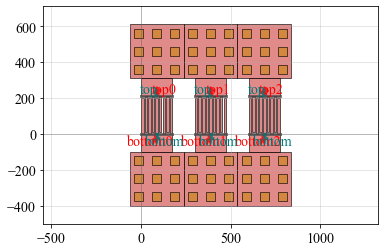

In [15]:

pars['ViaShape']='square'

pars['ViaAreaX']=300

pars['ViaAreaY']=300

pars['ViaSize']=50

pars['OverVia']=2

pars['ViaDistance']=100

complex_cell.set_params(pars)

complex_cell.view()

We can do these *composition* operation on any ```pcells``` (for example, ```pc.FBERes```)

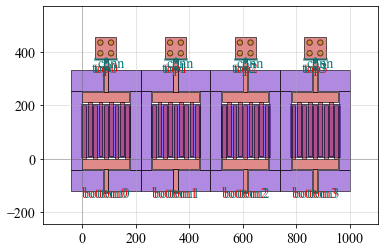

In [16]:
fberes_array=pm.addVia(pm.array(pc.FBERes,4),'top')
fberes_array().view()

Look at this super-cool one, ```pm.addProbe```:

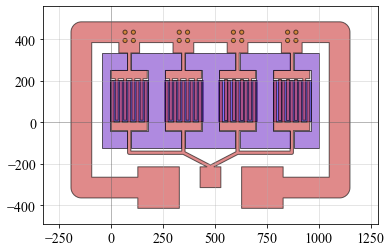

In [17]:
device_with_probe=pm.addProbe(fberes_array,pm.addLargeGnd(pc.GSGProbe))()

import pirel.tools as pt

pt.check(device_with_probe.draw(),joined=True)
